In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**RENAMING COLUMNS** 

In [2]:
import pandas as pd
filename="../input/googleform/Snowball WFH 2020 Responses.csv"
filename2 = "../input/dataforkenny2/Data for Kenny.csv"
df=pd.read_csv(filename)
df=df.drop('Timestamp',1)
df=df.rename(columns={'Are you over age 18?':'age18'})
df=df.rename(columns={'Have you been required to work from home for your job during the COVID coronavirus pandemic?':'wfhStatus'})
df=df.rename(columns={'How often do you meet with co-workers online?':'meetingFreq','Are you a full time student?':'student'})
df=df.rename(columns={'What types of interruptions have you seen co-workers experience during meetings?':'interruptions','Which video conferencing platform do you most frequently use for WFH?':'platform'})
df=df.rename(columns={'What types of interruptions have you experienced on your end while working from home?':'interruptions2'})
df=df.rename(columns={'We laugh a lot during our video conferences.':'laughter'})
df=df.rename(columns={'What types of informal behaviors have you seen in co-workers?':'informalBehvaiour'})
df=df.rename(columns={'My co-workers\' informality and interruptions during video conferencing bother me.':'tolerance'})
df=df.rename(columns={'Videoconferencing gives me a window into my co-workers\' personal lives.':'getprivateview'})
df=df.rename(columns={'My virtual meetings frequently experience non-work interruptions from either from my side or my co-workers.':'interruptions3'})
df=df.rename(columns={'My co-workers\' informality and interruptions online are unprofessional and hurt our work quality and/or output.':'workBadEffects'})
df=df.rename(columns={'My co-workers and I have fun and joke around during videoconferencing.':'haveFun'})
df=df.rename(columns={'What types of informal behaviors have you done yourself while working from home?':'selfInformalBehaviour'})
df=df.rename(columns={'My co-workers\' online behavior during meetings has become more informal since WFH.':'InformalityIncrease'})
df=df.rename(columns={'What is the average length of your virtual meetings?':'meetingLength'})
df2 = pd.read_csv('../input/dataforkenny2/Data for Kenny.csv')

**Train Test Split**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dv=['tolerance','getprivateview','workBadEffects']
dep=df[dv]
iv = df.drop(dv,1)
y = le.fit_transform(df.tolerance)
X = df.drop('tolerance',1)
X_train, X_valid, y_train,y_valid = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
s = (X.dtypes == 'object')
object_cols = list(s[s].index)
label_x_train = X_train.copy()
label_x_valid = X_valid.copy()
for col in object_cols:
    label_x_train[col] = le.fit_transform(X_train[col])
    label_x_valid[col] = le.fit_transform(X_valid[col])


**CREATING PIPELINE FOR DATA**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_pipeline = Pipeline(steps=[('model', model)])
my_pipeline.fit(label_x_train,y_train)
preds = my_pipeline.predict(label_x_valid)

print(preds)


**Selecting the best features**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=5)

X_new = selector.fit_transform(label_x_train, y_train)
X_new

selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                 index=label_x_train.index, 
                                 columns=label_x_train.columns)
selected_features.head()

selected_columns = selected_features.columns[selected_features.var() != 0]

# Get the valid dataset with the selected features.
X[selected_columns].head()

**Making model with best features**

In [ ]:
best_features=['student','laughter','workBadEffects','haveFun','selfInformalBehaviour']
final_X= X[best_features]
c = final_X.copy()
for cols in final_X.columns:
    c[cols] = le.fit_transform(final_X[cols])
c['tolerance']=y
c.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,6))
sns.scatterplot(x=c["tolerance"], y=c['haveFun'])


In [ ]:
h1 = ['laughter','haveFun','tolerance']
h1df = df[h1]
print(h1df.head())
for c in h1:
    h1df[c]=le.fit_transform(h1df[c])
h1df[['laughter', 'haveFun']].corr()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
dv=['Emp1','Emp2','Emp3']
dvv=['Emp3']
dep=df2[dvv]
iv = df2.drop(dv,1)

X_train, X_valid, y_train,y_valid = train_test_split(iv,dep,test_size=0.2)


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_pipeline = Pipeline(steps=[('model', model)])
my_pipeline.fit(X_train,y_train)
preds = my_pipeline.predict(X_valid)

print(preds)

predicted = cross_val_predict(model, boston.data, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

[3.118938  3.0740552 3.0740552 3.0428512 3.0251403 3.0428512 3.118938
 3.118938  3.130295  3.0428512 3.0428512 3.0251403 3.118938  3.0428512
 3.118938  3.0740552 2.708645  3.0251403 3.0428512 3.0428512 3.0428512
 3.118938  3.118938  3.118938  3.118938  3.0740552 3.0740552 3.0428512
 3.130295  3.0428512 3.0251403 3.0740552 3.0251403 3.118938  3.0428512
 3.0428512 3.0555048 3.118938  3.0251403 3.0740552 3.118938  3.118938
 3.0740552 3.0428512 3.0251403 3.0251403 3.0251403 3.0740552 3.0251403
 3.0740552 3.0555048 3.118938  3.0740552 3.130295  3.0428512 3.118938
 3.118938  2.708645  3.130295  3.0251403 3.0251403 3.0428512 3.0740552
 3.0740552 3.0555048 3.0428512 3.118938  3.0251403 3.0740552 3.0740552
 3.0740552 3.118938  3.0740552 3.0428512 3.0555048 3.0428512 3.0740552
 3.118938  3.0740552 3.0428512 3.118938  3.0428512 3.118938  3.0740552
 3.0740552 3.0428512 3.0740552 3.0428512 3.0428512 3.118938  3.0251403
 3.0251403 3.0428512 3.0428512 3.130295  2.708645  3.0251403 3.118938
 3.0428512

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=5)

X_new = selector.fit_transform(X_train, y_train)
X_new

selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                 index=X_train.index, 
                                 columns=X_train.columns)
selected_features.head()

selected_columns = selected_features.columns[selected_features.var() != 0]

# Get the valid dataset with the selected features.
X_train[selected_columns].head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,6))
sns.regplot(x=X_train['Beh1'], y=y_train['Emp3'])

In [64]:
df2.head()
#df2['Emp'] = (df2['Emp1']+df2['Emp2']+df2['Emp3'])/3
df2.head()
#drop = ['Emp1','Emp2','Emp3']
#df_composite = df2.drop(drop,1)
#df_composite.corr()
df2.head()


,WFH-YN,WFH-freq,WFH-length,WFH-platform,Beh1,Beh2,Beh3,Inter1,Inter2,Inter3,Emp1,Emp2,Emp3,Humor1,Humor2,Emp
0,1,5,4,1,3,2,3,1,1,2,1,1,4,4,2,2.000000
1,1,2,2,1,2,3,2,1,2,2,2,2,4,3,3,2.666667
2,1,1,6,1,1,6,6,5,6,5,5,5,5,1,5,5.000000
3,1,4,2,1,2,1,1,1,1,2,4,4,2,2,3,3.333333
4,1,4,1,1,3,5,2,4,3,3,5,3,3,3,3,3.666667


**H1 - Formality Dissipates - Regression b/w WFHFreq, WFn and Beh1**

              Beh1  WFH-freq
Beh1      1.000000  0.012182
WFH-freq  0.012182  1.000000


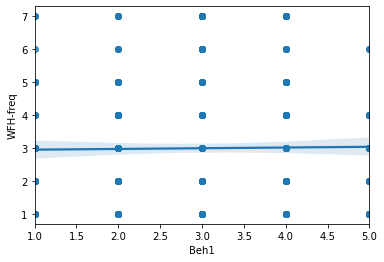

In [42]:
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
import matplotlib.pyplot as plt

import seaborn as sns
dv = ['Beh1','WFH-freq']
#iv = ['WFH-freq']

dep_df = df_composite[dv]
print(dep_df.corr())

sns.regplot(x=dep_df['Beh1'],y = dep_df['WFH-freq'])

          Humor1    Inter3    Inter2      Emp1      Emp3
Humor1  1.000000  0.057176 -0.061867  0.147638 -0.137119
Inter3  0.057176  1.000000  0.108218  0.333946  0.246869
Inter2 -0.061867  0.108218  1.000000 -0.091795  0.245154
Emp1    0.147638  0.333946 -0.091795  1.000000  0.006199
Emp3   -0.137119  0.246869  0.245154  0.006199  1.000000


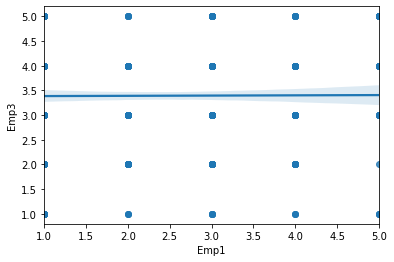

In [73]:
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
import matplotlib.pyplot as plt

import seaborn as sns
dv1 = ['Humor1','Inter3','Inter2','Emp1','Emp3']
dv2 = ['Humor1','Inter3','Inter2','Emp3']
#iv = ['WFH-freq']

dep_df1 = df2[dv1]
dep_df2 = df2[dv2]
print(dep_df1.corr())


sns.regplot(x=dep_df1['Emp1'],y = dep_df1['Emp3'])
#sns.jointplot(x=dep_df1['Humor1'],y = dep_df1['Emp1'], kind="kde")


**H3 = Interruptions in co-workers positively corelated with **

             Emp      Beh3    Inter1    Inter2
Emp     1.000000 -0.145303 -0.018997  0.017789
Beh3   -0.145303  1.000000  0.518581  0.380280
Inter1 -0.018997  0.518581  1.000000  0.563466
Inter2  0.017789  0.380280  0.563466  1.000000


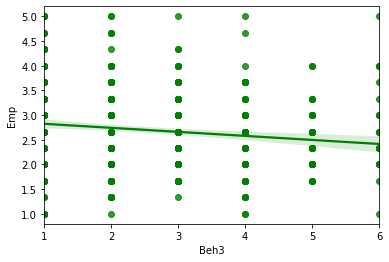

In [61]:
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
import matplotlib.pyplot as plt

import seaborn as sns
dv = ['Emp','Beh3','Inter1','Inter2']
#iv = ['WFH-freq']

dep_df = df_composite[dv]
print(dep_df.corr())

sns.regplot(x=dep_df['Beh3'],y = dep_df['Emp'],color='g')



**Shared interruptions increase empathy[](http://)**

In [75]:
dv = ['Beh3','Humor1','Inter1','Inter2','Emp3']
#iv = ['WFH-freq']

dep_df = df2[dv]
print(dep_df.corr())

#sns.regplot(x=dep_df['Beh3'],y = dep_df['Emp3'],color='g')

            Beh3    Humor1    Inter1    Inter2      Emp3
Beh3    1.000000 -0.068695  0.518581  0.380280  0.161416
Humor1 -0.068695  1.000000 -0.088987 -0.061867 -0.137119
Inter1  0.518581 -0.088987  1.000000  0.563466  0.164516
Inter2  0.380280 -0.061867  0.563466  1.000000  0.245154
Emp3    0.161416 -0.137119  0.164516  0.245154  1.000000


**Shared informal behaviors increase empathy**

In [85]:
dv = ['Beh1','Beh2','Humor1','Inter2','Emp1']
#iv = ['WFH-freq']

dep_df = df2[dv]
print(dep_df.corr())

            Beh1      Beh2    Humor1    Inter2      Emp1
Beh1    1.000000  0.219920  0.008836  0.127617  0.057453
Beh2    0.219920  1.000000 -0.056928  0.557634 -0.074448
Humor1  0.008836 -0.056928  1.000000 -0.061867  0.147638
Inter2  0.127617  0.557634 -0.061867  1.000000 -0.091795
Emp1    0.057453 -0.074448  0.147638 -0.091795  1.000000


Mandatory WFH mediated through video conferencing improves empathy

In [82]:
dv = ['WFH-YN','WFH-freq','Inter2','Humor1','Emp1']
#iv = ['WFH-freq']

dep_df = df2[dv]
print(dep_df.corr(method='pearson'))

          WFH-YN  WFH-freq    Inter2    Humor1      Emp1
WFH-YN       NaN       NaN       NaN       NaN       NaN
WFH-freq     NaN  1.000000 -0.238387  0.070783  0.027094
Inter2       NaN -0.238387  1.000000 -0.061867 -0.091795
Humor1       NaN  0.070783 -0.061867  1.000000  0.147638
Emp1         NaN  0.027094 -0.091795  0.147638  1.000000
